In [1]:
import math
import struct
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


class Data:
    dim = -1
    data = np.empty(0)
    markers = []

    def __init__(self, dim):
        self.dim = dim
        self.data = [[] for x in range(dim)]
        self.markers = []
                
    def axis(self, index):
        return self.data[index]
    
    def axisM(self, index, marker):
        result = []
        for i in range(0, len(self.data[index])):
            if (self.markers[i] == marker):
                result.append(self.data[index][i])
        
        return result
    
    def addPoint(self, dim, data):
        self.data[dim].append(data)
        
    def addMarker(self, marker):
        self.markers.append(marker)
        
    def sortByEigenValues(self, eVal):
        for i in range(len(self.data)-1,0,-1):
            for j in range(i):
                if (eVal[j] < eVal[j+1]):
                    eVal[j], eVal[j+1] = eVal[j+1], eVal[j]
                    t = self.data[j].copy()
                    self.data[j] = self.data[j+1]
                    self.data[j+1] = t    
        
        
def cloneData(ref) -> Data:
    data = Data(len(ref.data))
    data.data = np.copy(ref.data)
    data.markers = np.copy(ref.markers)
    return data

def draw3d(data, x, y, z, zdir, markers = []):
    colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow']
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    for i in range(0, len(markers)):
        ax.scatter(
            data.axisM(x, markers[i]), 
            data.axisM(y, markers[i]), 
            data.axisM(z, markers[i]), 
            zdir=zdir, s=30, c=colors[i], 
            depthshade=True)
    
def draw2d(data, x, y, markers = [], label = ''):
    colors = ['red', 'green', 'blue', 'orange', 'black', 'yellow']
    for i in range(0, len(markers)):
        plt.scatter(data.axisM(x, markers[i]), data.axisM(y, markers[i]), c = colors[i])
        plt.xlabel(label)
    plt.show()
    
    
def drawLine(dots, top = -1, fromOne = True):
    #plt.plot(range(1, len(dots)+1), dots)

    f, ax = plt.subplots(1)

    xdata = range(1 if fromOne else 0, len(dots) + (1 if fromOne else 0))
    ydata = dots
    ax.plot(xdata, ydata)
    ax.set_ylim(bottom=0)
    if (top > 0):
        ax.set_ylim(top=top)
    plt.show(f)



#int-dim int-число_точек double-X1 ... double-Xdim int-attr ... double-X1 ... double-Xdim int-attr  
def loadDataOld() -> Data:
    with open("data/ocr-8.dat", "rb") as f:
        dim = struct.unpack('=i', f.read(4))[0] # размерность
        count = struct.unpack('=i', f.read(4))[0] # количество точек
        #count = 100
        
        data = Data(dim)
        
        print('dimensionality:', dim)
        print('size:', count)
        
        def skip():
            for d in range(0, dim):
                f.read(8)
            f.read(4)
                
        for i in range(0, count): #count
            if (i % 8 != 0):
                skip()
            else:
                for d in range(0, dim):
                    data.addPoint(d, struct.unpack('@d', f.read(8))[0])
                    
                data.addMarker(struct.unpack('=i', f.read(4))[0]) # пропускаем атрибут

    return data


def loadData() -> Data:
    with open("data/ocr.dat", "rb") as f:
        count = struct.unpack('=i', f.read(4))[0] # количество точек
        dim = struct.unpack('=i', f.read(4))[0] # размерность
        #count = 100
        
        data = Data(dim)
        
        print('dimensionality:', dim)
        print('size:', count)
        
        def skip():
            for d in range(0, dim):
                f.read(8)
            f.read(4)
                
        for i in range(0, count): #count
            if (i % 8 != 0):
                skip()
            else:
                data.addMarker(struct.unpack('=i', f.read(4))[0]) # пропускаем атрибут
                for d in range(0, dim):
                    data.addPoint(d, struct.unpack('@d', f.read(8))[0])
                    

    return data


def loadRings() -> Data:
    data = Data(3)
    
    maxN = 250
    dimN = 3
    
    i = 0
    while(i < maxN):
        n1 = 0
        while(n1 < dimN and i < maxN):
            n1 += 1
            n2 = 0
            while(n2 < n1 and i < maxN):
                n2 += 1
                f = 6.2831 * (i/(dimN*(dimN-1)/2))/(maxN/(dimN*(dimN-1)/2))
                
                data.addPoint(0, 15.0 + 10.0 * math.sin(f))
                data.addPoint(1, 15.0 + 10.0 * math.cos(f))
                data.addPoint(2, pow(i,1) / 10)
                data.addMarker(0 if i < 25 else 1)
                i += 1
                
    return data

def loadClusters() -> Data:
    data = Data(3)

    for i in range(300):
        if (np.random.random_sample() < 0.6):
            data.addPoint(0, 100 + np.random.random_sample() * 100)
            data.addPoint(1, 50 + np.random.random_sample() * 100)
        else:
            data.addPoint(0, 140 + np.random.random_sample() * 20)
            data.addPoint(1, 90 + np.random.random_sample() * 20)

        data.addPoint(2, 200 + np.random.random_sample() * 5)
        data.addMarker(0)


    data.markers = np.zeros(320)
    return data

def loadNoise() -> Data:
    data = Data(5)
    data.data = np.random.rand(5, 200)
    data.markers = np.zeros(200)
    return data

In [2]:
data = loadData()
dataLen = len(data.data[0])
print('len:', dataLen)

dimensionality: 25
size: 840
len: 105


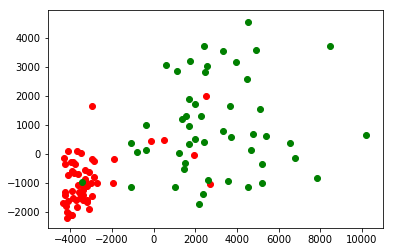

In [52]:
#Считаем ковариационную матрицу
cdata = cloneData(data)

covMat = np.cov(cdata.data)
eVals, eVecs = np.linalg.eig(covMat)
# cdata.sortByEigenValues(eVals)

disp = []
for i in range(cdata.dim):
    maxVal = max(cdata.data[i])
    minVal = min(cdata.data[i])
    disp.append(maxVal - minVal)

cdata.sortByEigenValues(disp)

draw2d(cdata, 0, 2, [0,1])

In [50]:
#PCA
eVecTuple = ()
pcaData = Data(cdata.dim)
pcaData.sortByEigenValues(eVals)

for i in range(0, cdata.dim):
    eVecTuple += (eVecs[:,i],)
    
pcaData.data = np.dot(np.vstack(eVecTuple), cdata.data)
pcaData.markers = np.zeros(len(cdata.data[0]))

Проекция 0 : 0.8724
Проекция 1 : 0.7008
Проекция 2 : 0.5934
Проекция 3 : 0.5134
Проекция 4 : 0.4609
Проекция 5 : 0.4182
Проекция 6 : 0.3806
Проекция 7 : 0.3450
Проекция 8 : 0.3171
Проекция 9 : 0.2889
Проекция 10 : 0.2639
Проекция 11 : 0.2424
Проекция 12 : 0.2214
Проекция 13 : 0.1987
Проекция 14 : 0.1781
Проекция 15 : 0.1599
Проекция 16 : 0.1413
Проекция 17 : 0.1240
Проекция 18 : 0.1083
Проекция 19 : 0.0914
Проекция 20 : 0.0757
Проекция 21 : 0.0610
Проекция 22 : 0.0437
Проекция 23 : 0.0258
Проекция 24 : 0.0000


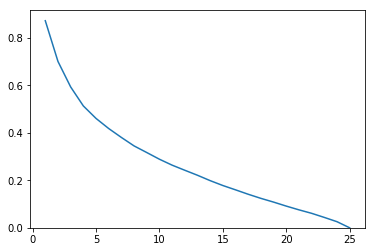

In [51]:
# Квадрат относительной ошибки для PCA
errList1 = []
for i in range(0, cdata.dim):
    err = math.sqrt(abs(eVals[i + 1:].sum()/eVals[:i + 1].sum()))
    errList1.append(err)
    print ("Проекция", i, ": %.4f" % (err))

drawLine(errList1)

In [48]:
def getRealDimensionality(distances, epsilon) -> int:
    dim = 0
    for i in range(len(distances)-1):
        dim += 1
        der = distances[i+1] - distances[i]
        if (abs(der) < 1e-2 and abs(distances[i]) <= epsilon or abs(distances[i]) <= epsilon): # тут надо че-то придумать с производной
            return dim

    return dim

def getVectorLen(point1, point2):
    dist = 0
    for i in range(0, len(point1)):
        dist += pow(point1[i] - point2[i], 2)

    return math.sqrt(dist)

# возвращает расстояния от point до всех точек из matr. E/e ij
def getDistance(matr, point):
    dist = np.zeros(len(matr))
    for i in range(0, len(matr)):
        dist[i] = getVectorLen(point, matr[i])

    return dist

def scale(refDistance, proj, alpha):
    counter = 0
    prevDistance = 1e300
    dim = len(proj[0])
    distance = 0
    projSteps = []

    while(counter < 100):
        counter+=1
        projDistance = []
        # рассчет e_ij
        for i in range(0, dataLen):
            projDistance.append(getDistance(proj, proj[i]))

        distance = 0 #L
        for i in range(0, dataLen):
            for j in range(0, dataLen):
                distance += pow(projDistance[j][i] - refDistance[j][i], 2)
        
        # print(dim,':', distance)
        if (np.isnan(distance) or distance == 0 or (prevDistance - distance) / pow(10, math.log10(distance)) < 0.01):
            break

        # двигаем точки
        #alpha = 1.7e-10 / dataLen
        newMatr = np.empty(dataLen * len(proj[0])).reshape(len(proj), len(proj[0]))
        for k in range(0, dataLen):
            point = proj[k]
            newMatr[k] = point.copy()
            vector = np.zeros(len(proj[0]))
            for i in range(0, dataLen):
                vector += (projDistance[i][k] - refDistance[i][k]) * (point - proj[i])
            
            vector *= alpha
            newMatr[k] -= vector

        proj = newMatr
        prevDistance = distance
        projSteps.append(proj)

    return distance, proj, projSteps


proj to 1 dim: 91084022069.93483
proj to 2 dim: 32216778950.200146
proj to 3 dim: 13019478061.266098
proj to 4 dim: 7222779446.3701315
proj to 5 dim: 4839822380.289943
proj to 6 dim: 3471935918.6483107
proj to 7 dim: 2362737087.8509617
proj to 8 dim: 1809629588.3191388
proj to 9 dim: 1432591674.5161207
proj to 10 dim: 1136797716.1143403
proj to 11 dim: 963648422.5551808
proj to 12 dim: 712624565.3150238
proj to 13 dim: 437988580.083141
proj to 14 dim: 353660505.9086526
proj to 15 dim: 313781848.4389515
proj to 16 dim: 235703208.8130207
proj to 17 dim: 156364755.34017235
proj to 18 dim: 111352163.74235985
proj to 19 dim: 43003218.5734504
proj to 20 dim: 31738776.49110381
proj to 21 dim: 23096267.48460481
proj to 22 dim: 15140910.077790072
proj to 23 dim: 9823988.108509421
proj to 24 dim: 800409.98543063
proj to 25 dim: 0.0
Real demensionality: 4


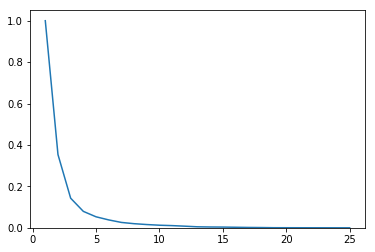

In [20]:
xTransp = cdata.data.transpose((1,0)).copy()
distsInSrc = []
projResults = []
distances = []

# рассчет E_ij
for i in range(0, dataLen):
    distsInSrc.append(getDistance(xTransp, xTransp[i]))

alpha = 4.7e-5 / dataLen


projSteps = []
for i in range(1, len(xTransp[0]) + 1):
    if i == len(xTransp[0]):
        projRef = cdata.data.transpose((1,0)).copy()
    else:
        projRef = cdata.data[0:i].transpose((1,0)).copy()

    distance, proj, steps = scale(distsInSrc, projRef, alpha)
    distances.append(distance)
    projResults.append(proj)
    projSteps.append([x.transpose((1,0)) for x in steps])
    print('proj to',i,'dim:',distance)
    # break


distances /= max(distances)
drawLine(distances)
print('Real demensionality:', getRealDimensionality(distances, 0.1))

In [47]:
 count = 1
 for d in distances:
     print(count, ':', d)
     count += 1

1 : 1.0
2 : 0.3537039561720707
3 : 0.14293920893468745
4 : 0.07929798533517152
5 : 0.05313580000424113
6 : 0.03811794692138802
7 : 0.025940192738050573
8 : 0.01986769520267446
9 : 0.01572824346092412
10 : 0.012480758867252266
11 : 0.010579774593345099
12 : 0.007823815298449015
13 : 0.004808621425905533
14 : 0.0038827941264726984
15 : 0.0034449713715763233
16 : 0.0025877558265054047
17 : 0.0017167089439694989
18 : 0.001222521373253182
19 : 0.00047212691750076965
20 : 0.0003484560274109832
21 : 0.00025357101014787604
22 : 0.00016623014370363218
23 : 0.0001078563274354146
24 : 8.787600363278542e-06
25 : 0.0


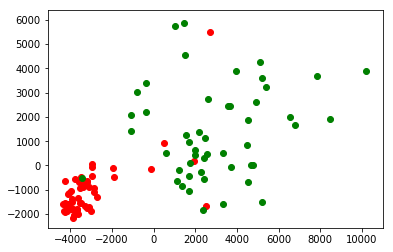

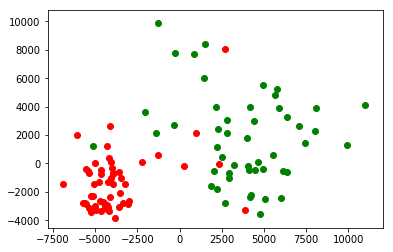

In [29]:
draw2d(cdata, 0, 1, [0,1])

dim = 2
projData.data = projSteps[dim-1][len(projSteps[dim-1])-1]
projData.markers = cdata.markers
draw2d(projData,0,1,[0,1])

In [30]:
"""
Нормализуем данные.
Считаем сумму расстояний между N реальными точками до ближайшего соседа -> u.
Накидываем в распределение N исскуственных точек.
Считаем сумму расстояний между искуственными и случайными точками -> w.
k = w / (u+w)
Чем выше, тем больше кластерность

Проверить критерий для PCA и сравнить с MDS

Исходные нормировать так, чтобы дисперсия 1, а среднее (мат ожидание) 0
Также нагенерировать данные, но с нормальным распределением (от -sqrt(3) до sqrt(3))

"""

def standardDeviation(points) -> float:
    dim = len(points[0])
    deviations = []

    def mean(fid):
        mean = 0
        for i in range(len(points)):
            mean += points[i][fid]

        return mean/len(points)

    for i in range(dim):
        meanVal = mean(i)
        sumVal = 0
        for j in range(len(points)):
            sumVal += pow(points[j][i] - meanVal, 2)

        deviations.append(math.sqrt(sumVal/len(points)))

    return deviations

# возвращает расстояние до ближайшего соседа точки point в matr
def getDistanceToNeigbour(matr, point, index) -> float:
    dist = np.zeros(len(matr)-1)
    offset = 0
    for i in range(0, len(matr)):
        if i == index:
            offset = -1
            continue

        dist[i+offset] = getVectorLen(point, matr[i])

    return min(dist)

# генерирует случайные данные по реальным
def generateDataByReal(points):
    length = len(points)
    dim = len(points[0])
    generated = np.empty(length * dim)

    for i in range(length*dim):
        generated[i] =  (2 * np.random.random_sample() - 1) * math.sqrt(3)

    return np.reshape(generated, (length,dim))

Критерий Хопкинса MDS
proj to 1 dim: 0.7117412155800438
proj to 2 dim: 0.6696670383506785
proj to 3 dim: 0.6267148333179654
proj to 4 dim: 0.6491024061257958
proj to 5 dim: 0.6456483636282937
proj to 6 dim: 0.6295661601313108
proj to 7 dim: 0.6331392042827232
proj to 8 dim: 0.6367159647671833
proj to 9 dim: 0.6371708763219085
proj to 10 dim: 0.6375594873129835
proj to 11 dim: 0.63538105734589
proj to 12 dim: 0.6319808583268215
proj to 13 dim: 0.6312205580273548
proj to 14 dim: 0.6305432702317136
proj to 15 dim: 0.6328851205907593
proj to 16 dim: 0.6308196935026824
proj to 17 dim: 0.6291359887647968
proj to 18 dim: 0.6300809920255328
proj to 19 dim: 0.6270315213956129
proj to 20 dim: 0.6293048025984185
proj to 21 dim: 0.6294438415945096
proj to 22 dim: 0.629714531768823
proj to 23 dim: 0.6290197819927357
proj to 24 dim: 0.6298360325805877
proj to 25 dim: 0.6309065802593324


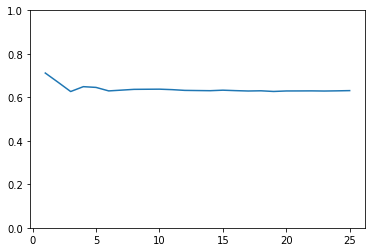

In [67]:
def calculateHopkins(points) -> float:
    points = points.copy()
    length = len(points[0])


    def meanL(points):
        return sum(points) / len(points)


    def variationL(points):
        var = 0
        for p in points:
            var += math.pow(p, 2)
        return math.sqrt(var / len(points))


    def mean(points):
        means = np.zeros(len(points[0]))
        for i in points:
            means += i

        return means / len(points)    

    def variation(points):
        var = np.zeros(len(points[0]))
        for p in points:
            var += [math.pow(x,2) for x in p]

        return [math.sqrt(x/len(points)) for x in var]

    linear = np.reshape(points, length * len(points))
    points -= meanL(linear)
    points /= variationL(linear)

    
    # points -= mean(points)
    # points /= variation(points)



    distInReal = 0
    for i in range(len(points)):
        distInReal += getDistanceToNeigbour(points, points[i], i)
    
    generated = generateDataByReal(points)
    linearG = np.reshape(generated, length * len(generated))
    
    distInGenerated = 0
    for i in range(len(generated)-1):
        distInGenerated += getDistanceToNeigbour(points, generated[i], i)

    # print('----')
    # sdPoints = standardDeviation(points)
    # sdGenerated = standardDeviation(generated)
    # for i in range(length):
        # print('std dev:', sdPoints[i], sdGenerated[i])

    return distInGenerated / (distInReal + distInGenerated)


#calculateHopkins(projResults[2])

print('Критерий Хопкинса MDS')
hopkinsMds = []
for i in range(len(projResults)):
    hopkinsMds.append(calculateHopkins(projResults[i]))
    print('proj to',str(i+1),'dim:', hopkinsMds[i])

# print(hopkinsMds)
drawLine(hopkinsMds,1)

Критерий Хопкинса исходные


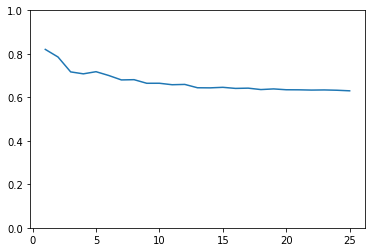

In [68]:
print('Критерий Хопкинса исходные')
hopkinsRef = []
for i in range(len(projResults)):
    hopkinsRef.append(calculateHopkins(cdata.data[:i+1].transpose((1,0))))
    # print('proj to',str(i+1),'dim:', hopkinsRef[i])

drawLine(hopkinsRef,1)

In [12]:
'''
Критерий Губерта

В отчет: репетиция диплома.
Что за задача, что используем

Использовали MDS, вот стресс функция, вот такая-то размерность, критерий хопкинса говорит, что структура не нарушается и т.п...




'''

'\nКритерий Губерта\n\nВ отчет: репетиция диплома.\nЧто за задача, что используем\n\nИспользовали MDS, вот стресс функция, вот такая-то размерность, критерий хопкинса говорит, что структура не нарушается и т.п...\n\n\n\n\n'

Критерий Хопкинса PCA


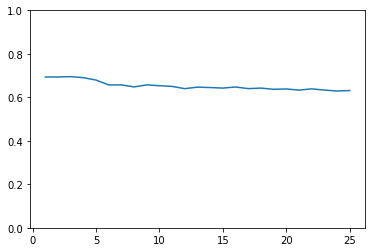

In [60]:
print('Критерий Хопкинса PCA')
hopkinsPca = []
for i in range(len(projResults)):
    hopkinsPca.append(calculateHopkins(pcaData.data[:i+1].transpose((1,0))))
    # print('proj to',str(i+1),'dim:', hopkinsPca[i])

drawLine(hopkinsPca,1)

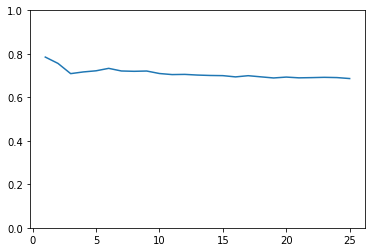

In [34]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan

def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X[rand_X[j]].reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H


hopkinsOther = []
for i in range(len(projResults)):
    hopkinsOther.append(hopkins(projResults[i]))
    # print('proj to',str(i+1),'dim:', hopkinsOther[i])

#print(hopkinsOther)
drawLine(hopkinsOther,1)